# Introduction to CNN and Computer Vision with TensorFlow

## Get the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-04-20 14:19:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.183.128, 173.194.193.128, 173.194.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.183.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   135MB/s    in 0.8s    

2023-04-20 14:19:27 (135 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [6]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Apr 20 14:19 .
drwxr-xr-x 1 root root 4096 Apr 20 14:19 ..
drwxr-xr-x 4 root root 4096 Apr 20 14:19 test
drwxr-xr-x 4 root root 4096 Apr 20 14:19 train


In [7]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [8]:
import pathlib
import numpy  as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

['271779.jpg']
Image shape: (512, 382, 3)


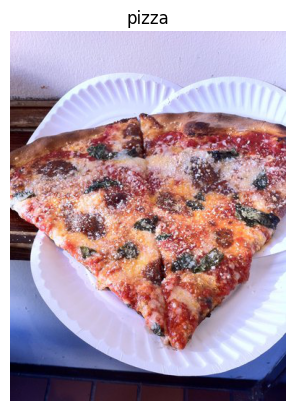

In [10]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [11]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 382, 3), dtype=uint8, numpy=
array([[[229, 213, 240],
        [228, 212, 239],
        [229, 213, 240],
        ...,
        [212, 206, 242],
        [212, 206, 242],
        [212, 208, 243]],

       [[234, 218, 245],
        [227, 211, 238],
        [227, 211, 240],
        ...,
        [217, 211, 247],
        [218, 212, 248],
        [216, 212, 247]],

       [[235, 219, 246],
        [225, 209, 236],
        [226, 210, 239],
        ...,
        [219, 213, 249],
        [218, 214, 249],
        [215, 211, 246]],

       ...,

       [[ 24,  10,  46],
        [ 25,  11,  47],
        [ 25,  11,  47],
        ...,
        [ 13,   5,  29],
        [ 14,   4,  29],
        [ 14,   4,  29]],

       [[ 26,  12,  48],
        [ 26,  12,  48],
        [ 26,  12,  48],
        ...,
        [ 13,   5,  29],
        [ 14,   4,  29],
        [ 14,   4,  29]],

       [[ 24,  10,  46],
        [ 24,  10,  46],
        [ 25,  11,  47],
        ...,
        [ 13,   5,  2

In [12]:
img.shape

(512, 382, 3)

In [13]:
img/255

array([[[0.89803922, 0.83529412, 0.94117647],
        [0.89411765, 0.83137255, 0.9372549 ],
        [0.89803922, 0.83529412, 0.94117647],
        ...,
        [0.83137255, 0.80784314, 0.94901961],
        [0.83137255, 0.80784314, 0.94901961],
        [0.83137255, 0.81568627, 0.95294118]],

       [[0.91764706, 0.85490196, 0.96078431],
        [0.89019608, 0.82745098, 0.93333333],
        [0.89019608, 0.82745098, 0.94117647],
        ...,
        [0.85098039, 0.82745098, 0.96862745],
        [0.85490196, 0.83137255, 0.97254902],
        [0.84705882, 0.83137255, 0.96862745]],

       [[0.92156863, 0.85882353, 0.96470588],
        [0.88235294, 0.81960784, 0.9254902 ],
        [0.88627451, 0.82352941, 0.9372549 ],
        ...,
        [0.85882353, 0.83529412, 0.97647059],
        [0.85490196, 0.83921569, 0.97647059],
        [0.84313725, 0.82745098, 0.96470588]],

       ...,

       [[0.09411765, 0.03921569, 0.18039216],
        [0.09803922, 0.04313725, 0.18431373],
        [0.09803922, 0

## An end-to-end example

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# model_1 = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(filters=10,
#                            kernel_size=3,
#                            activation="relu",
#                            input_shape=(224, 224, 3)),  
#     tf.keras.layers.Conv2D(10, 3, activation="relu"),
#     tf.keras.layers.MaxPool2D(pool_size=2,
#                               padding="valid"),
#     tf.keras.layers.Conv2D(10, 3, activation="relu"), 
#     tf.keras.layers.Conv2D(10, 3, activation="relu"), 
#     tf.keras.layers.MaxPool2D(2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(1, activation="sigmoid")                         
# ])

# # Compile our CNN
# model_1.compile(loss="binary_crossentropy",
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=["accuracy"])

# history_1 = model_1.fit(train_data,
#             epochs=5,
#             steps_per_epoch=len(train_data),
#             validation_data=valid_data,
#             validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [15]:
# model_1.summary()

## Using the same model as before

In [16]:
tf.random.set_seed(42)

# model_2 = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
#     tf.keras.layers.Dense(4, activation="relu"),
#     tf.keras.layers.Dense(4),
#     tf.keras.layers.Activation(tf.keras.activations.relu),
#     tf.keras.layers.Dense(1, activation="sigmoid")
# ])

# model_2.compile(loss=tf.keras.losses.binary_crossentropy,
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=["accuracy"])

# history_2 = model_2.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=valid_data,
#                         validation_steps=len(valid_data))

In [17]:
tf.random.set_seed(42)

# model_3 = tf.keras.Sequential([
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(300, activation="relu", input_shape=[224, 224, 3]),
#     tf.keras.layers.Dense(300, activation="relu"),
#     tf.keras.layers.Dense(150, activation="relu"),
#     tf.keras.layers.Dense(50, activation="relu"),
#     tf.keras.layers.Dense(1, activation="sigmoid")
# ])

# model_3.compile(loss="binary_crossentropy",
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=["accuracy"])

# history_3 = model_3.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=valid_data,
#                         validation_steps=len(valid_data))

In [18]:
# model_2.summary()

In [19]:
# model_3.summary()

## Binary Classification: Let's break it down

### 1. Become one with the data

['1826066.jpg']
Image shape: (512, 512, 3)
['3434372.jpg']
Image shape: (512, 512, 3)


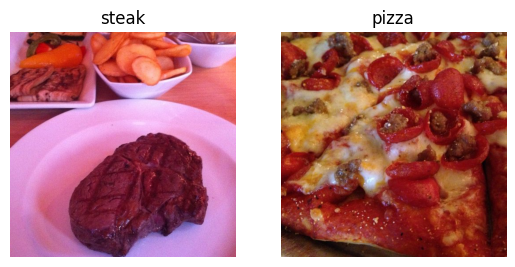

In [20]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [22]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [24]:
len(train_data)

47

In [25]:
images[:2], images[0].shape

(array([[[[0.19607845, 0.16078432, 0.09411766],
          [0.20000002, 0.16470589, 0.09803922],
          [0.21568629, 0.16862746, 0.1137255 ],
          ...,
          [0.01960784, 0.01960784, 0.01960784],
          [0.01960784, 0.01960784, 0.01960784],
          [0.01960784, 0.01960784, 0.01960784]],
 
         [[0.21176472, 0.18039216, 0.10588236],
          [0.22352943, 0.18039216, 0.10980393],
          [0.23529413, 0.18431373, 0.12156864],
          ...,
          [0.01960784, 0.01960784, 0.01960784],
          [0.01960784, 0.01960784, 0.01960784],
          [0.01960784, 0.01960784, 0.01960784]],
 
         [[0.24313727, 0.20000002, 0.1137255 ],
          [0.2392157 , 0.19607845, 0.11764707],
          [0.24705884, 0.19607845, 0.12156864],
          ...,
          [0.01960784, 0.01960784, 0.01960784],
          [0.01960784, 0.01960784, 0.01960784],
          [0.01960784, 0.01960784, 0.01960784]],
 
         ...,
 
         [[0.80392164, 0.79215693, 0.7725491 ],
          [0.81176

In [26]:
images[7].shape

(224, 224, 3)

In [27]:
labels

array([1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

In [28]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [29]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [30]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [31]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model



In [32]:
len(train_data), len(test_data)

(47, 16)

In [33]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 246ms/step - loss: 0.7568 - accuracy: 0.6440 - val_loss: 0.3931 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4044 - accuracy: 0.8320 - val_loss: 0.3535 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 10s 222ms/step - loss: 0.3146 - accuracy: 0.8780 - val_loss: 0.3905 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 10s 221ms/step - loss: 0.2018 - accuracy: 0.9320 - val_loss: 0.3402 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 11s 226ms/step - loss: 0.1351 - accuracy: 0.9620 - val_loss: 0.3681 - val_accuracy: 0.8320


### 5. Evaluating our model

<Axes: >

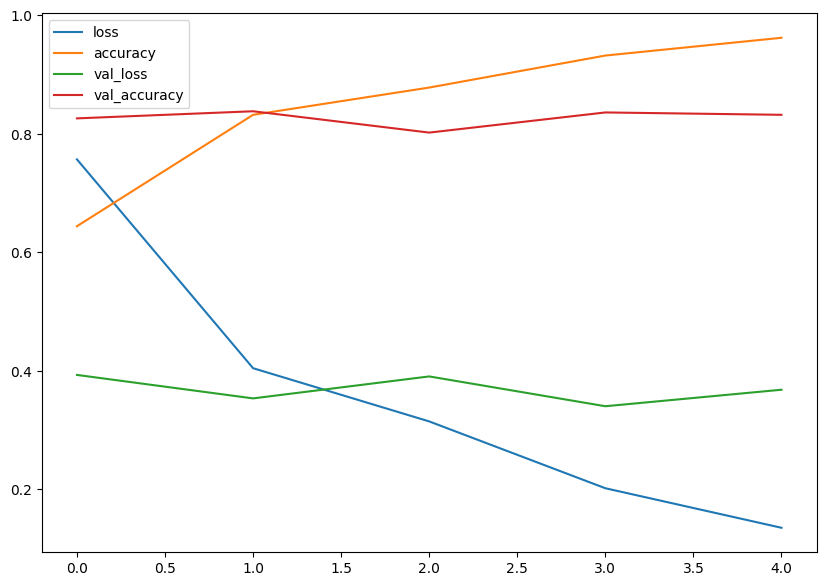

In [34]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [35]:
history_4.history["loss"]

[0.7568067908287048,
 0.40441596508026123,
 0.31460052728652954,
 0.20183826982975006,
 0.1351228505373001]

In [36]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

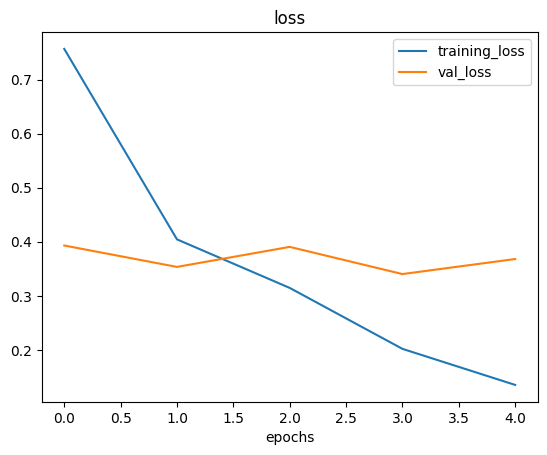

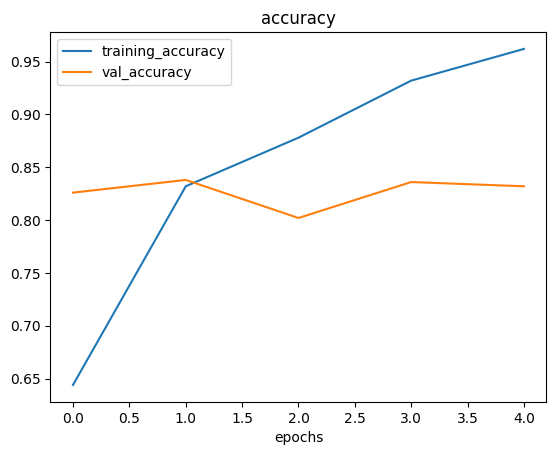

In [37]:
plot_loss_curves(history_4)

### 6. Adjust the model parameters

In [38]:
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [39]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [40]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 220ms/step - loss: 0.6264 - accuracy: 0.6413 - val_loss: 0.4669 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4904 - accuracy: 0.7800 - val_loss: 0.4112 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 10s 203ms/step - loss: 0.4723 - accuracy: 0.7880 - val_loss: 0.3992 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 10s 213ms/step - loss: 0.4447 - accuracy: 0.8153 - val_loss: 0.4014 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 10s 213ms/step - loss: 0.4232 - accuracy: 0.8260 - val_loss: 0.3701 - val_accuracy: 0.8280


In [41]:
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)      

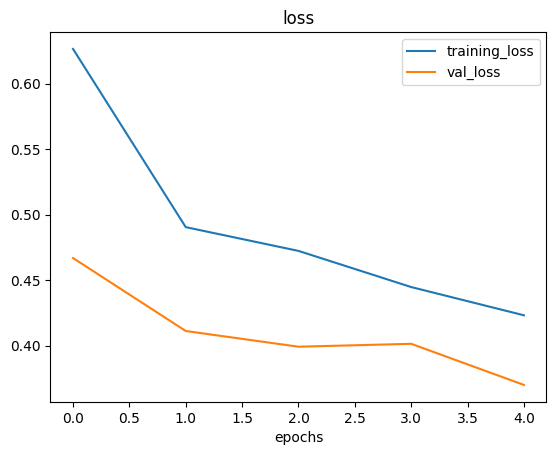

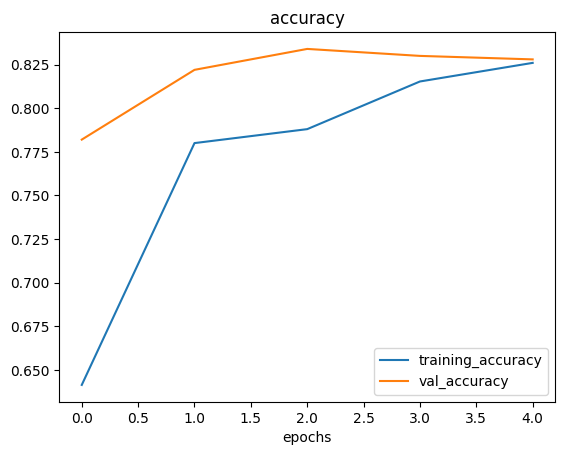

In [42]:
plot_loss_curves(history_5)

## Opening our bag of tricks and finding data augmentation

In [43]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [44]:
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)

print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


In [45]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 29


(-0.5, 223.5, 223.5, -0.5)

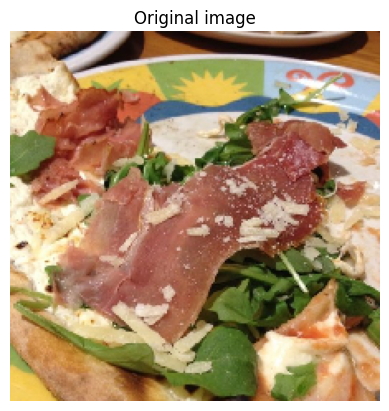

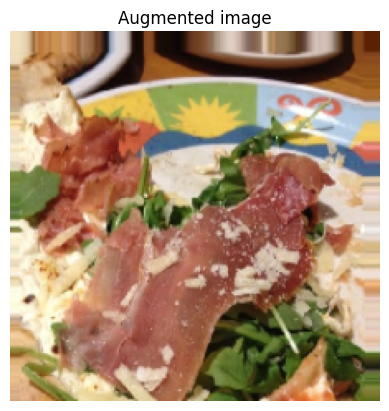

In [46]:
import random
random_number = random.randint(0, 32)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

In [47]:
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 513ms/step - loss: 0.7054 - accuracy: 0.4673 - val_loss: 0.6740 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 26s 553ms/step - loss: 0.6873 - accuracy: 0.5013 - val_loss: 0.6539 - val_accuracy: 0.5880
Epoch 3/5
47/47 [==============================] - 24s 506ms/step - loss: 0.6693 - accuracy: 0.5920 - val_loss: 0.6319 - val_accuracy: 0.6720
Epoch 4/5
47/47 [==============================] - 30s 633ms/step - loss: 0.6961 - accuracy: 0.5667 - val_loss: 0.6701 - val_accuracy: 0.7020
Epoch 5/5
47/47 [==============================] - 24s 515ms/step - loss: 0.6684 - accuracy: 0.6273 - val_loss: 0.6179 - val_accuracy: 0.6800


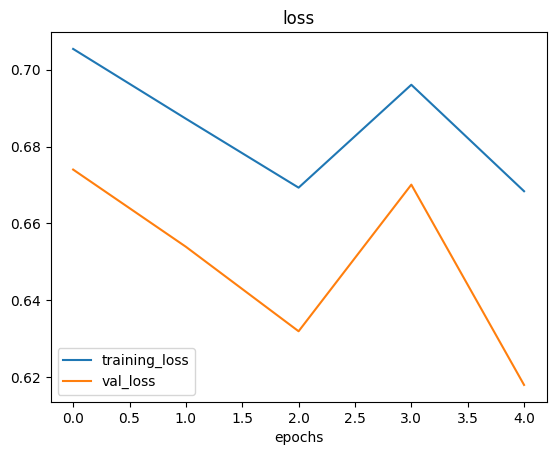

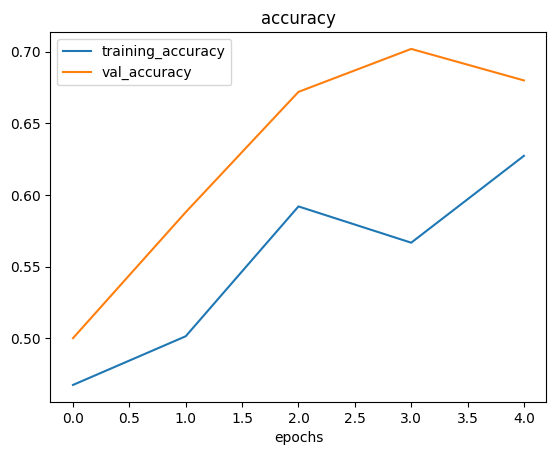

In [48]:
plot_loss_curves(history_6)

In [49]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [50]:
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 544ms/step - loss: 0.6678 - accuracy: 0.5947 - val_loss: 0.6093 - val_accuracy: 0.6300
Epoch 2/5
47/47 [==============================] - 26s 557ms/step - loss: 0.5507 - accuracy: 0.7287 - val_loss: 0.3812 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 24s 505ms/step - loss: 0.4921 - accuracy: 0.7687 - val_loss: 0.6064 - val_accuracy: 0.6940
Epoch 4/5
47/47 [==============================] - 24s 521ms/step - loss: 0.4903 - accuracy: 0.7820 - val_loss: 0.3908 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 24s 503ms/step - loss: 0.4846 - accuracy: 0.7780 - val_loss: 0.3347 - val_accuracy: 0.8600


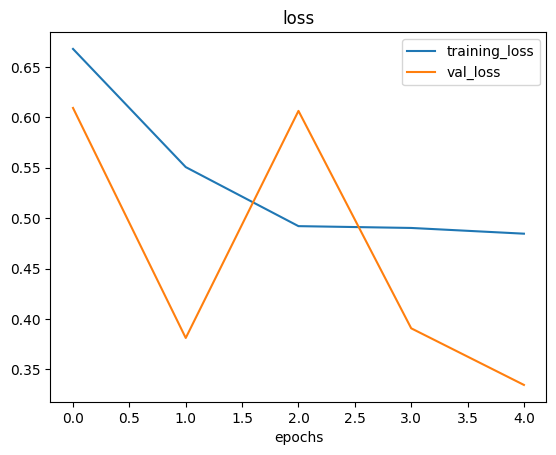

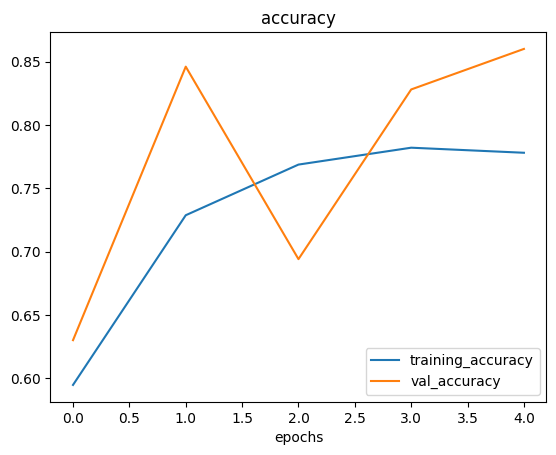

In [51]:
plot_loss_curves(history_7)

### 7. Repeat until satisfied

## Making a prediction on our custom data

In [52]:
print(class_names)

['pizza' 'steak']


--2023-04-20 14:27:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2023-04-20 14:27:31 (31.5 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

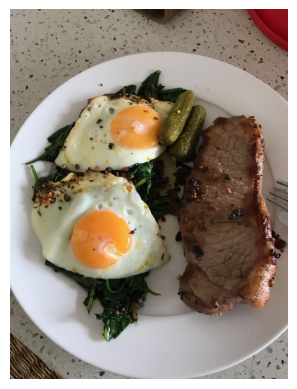

In [53]:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [54]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img

In [55]:
steak = load_and_prep_image("03-steak.jpeg")

In [56]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 192ms/step


array([[0.76851696]], dtype=float32)

In [57]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [58]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [59]:
def pred_and_plot(model, filename, class_names=class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 21ms/step


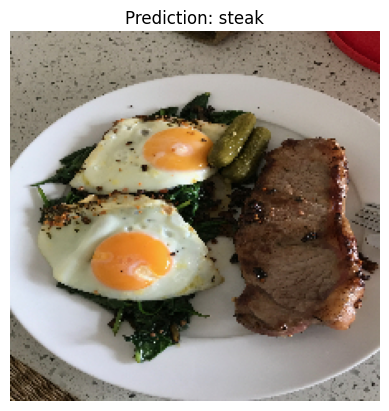

In [60]:
pred_and_plot(model_7, "03-steak.jpeg")

--2023-04-20 14:27:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2023-04-20 14:27:35 (43.0 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 23ms/step


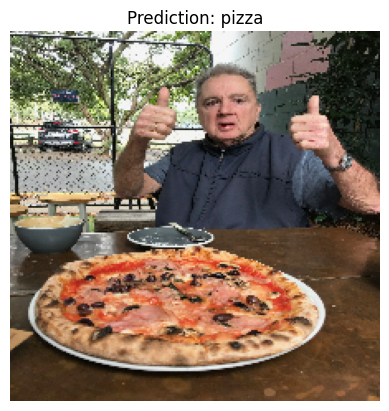

In [61]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi-class Image Classification

## 1. Import and become one wih the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [67]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [68]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [72]:
print(pathlib.Path(train_dir))
print(data_dir.glob('*'))

10_food_classes_all_data/train
<generator object Path.glob at 0x7f8ed410feb0>


['988684.jpg']
Image shape: (512, 512, 3)


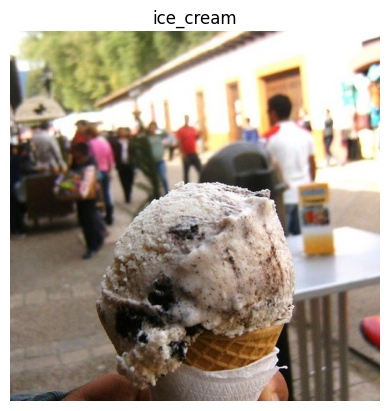

In [77]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## 2. Preprocess the data (prepare it for a model)

In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model (start with a baseline)

In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation=tf.keras.activations.relu),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])